In [1]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.load("reshaped_14.npy")

In [2]:
mean = 4
cov  = 4
samples = 60000
# input_size = 784
input_size = 196
# input_size = 100
Xf = X_train.reshape(samples,input_size)
Xf = Xf/255.0
# defining functions

np.random.seed(420)

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def relu(x):
    x[x<0]=0
    return x

def relu(x, derivative=False):
    res = x
    return res * (res > 0)

def diff_relu(x):
    res = x
    return res * (res > 1)

def diff_SSE(y,x,batch_size):
    return (2*(y-x))/batch_size

def CCE(x,y):
    epsilon = 10e-8
    loss = x * np.log(y + epsilon) + (1 - x) * np.log(1 - y+ epsilon)
    return loss

def diff_CCE(x,y):
    epsilon = 10e-8
    loss = -(x-y + epsilon)/(y*(1-y) + epsilon)
    return loss

def layer(x,W,b):
    return np.matmul(x,W)+b

def backprop_layer_relu(prev_delta,out_prev,weights_prev):
    sn = (diff_relu(out_prev)*np.matmul(prev_delta,weights_prev.T))
    return sn

def backprop_layer_sigm(prev_delta,out_prev,weights_prev):
    sn = (diff_sigm(out_prev)*np.matmul(prev_delta,weights_prev.T))
    return sn

Wc = np.random.normal(0,1e-6,(input_size,mean))
Bc = np.random.normal(0,1e-6,(1,mean))

Wm = np.random.normal(0,1e-6,(input_size,mean))
Bm = np.random.normal(0,1e-6,(1,mean))

Wd = np.random.normal(0,1e-6,(mean,input_size))
Bd = np.random.normal(0,1e-6,(1,input_size))

In [3]:
#Here the covariance is log coavriance but named as coavriance for peace of mind while coding
lr = 1e-4
epochs = 200
batch_size = 100
Lambda = 1
number_of_batches = samples/batch_size
X_t = Xf
# plt.imshow(X[1][10].reshape(14,14), cmap='gray')
for i in range(epochs):
    wm = np.zeros(Wm.shape)
    bm = np.zeros(Bm.shape)
    wc = np.zeros(Wc.shape)
    bc = np.zeros(Bc.shape)
    wd = np.zeros(Wd.shape)
    bd = np.zeros(Bd.shape)
    for j in range(number_of_batches):
        X = (X_t[j*batch_size:(j+1)*batch_size])
#         print(X.shape)
        loss = 0
        #forward pass
        outm = layer(X,Wm,Bm)
        mean  = relu(outm)
        outc = layer(X,Wc,Bc)
        cova  = relu(outc)
        gaus = np.random.normal(0,1,(cova.shape))
        Z    = mean + np.multiply((np.exp(0.5*cova)),gaus)
        outy = layer(Z,Wd,Bd)
        y    = sigm(outy)
        # Backprop decoder part 
        temp = diff_SSE(y,X,batch_size)*diff_sigm(outy)
#         temp = diff_CCE(X,y)*diff_sigm(outy)
        bd   += np.sum(temp,axis=0)
        wd   += np.matmul(Z.T,temp)
    
        ### Backprop Encoder part
        sct = -0.5*gaus*np.exp(0.5*cova)*np.matmul(temp,Wd.T)*diff_relu(outc)
        smt = -np.matmul(temp,Wd.T)*diff_relu(outm)
        sm = smt + 2*(mean)*diff_relu(outm)*Lambda
        sc = sct + 0.5*(np.exp(cova)-1)*diff_relu(outc)*Lambda   
        ### 
    
        bm += np.sum(sm, axis=0).reshape(bm.shape)
        wm += np.matmul(X.T,sm)
    
        bc += np.sum(sc, axis=0).reshape(bc.shape)
        wc += np.matmul(X.T,sc)
    
        loss_1 = np.sum((y-X)**2)/batch_size
#         loss_1 = -np.sum(CCE(X,y))
        loss_2 = np.sum(np.exp(cova)-1-cova + mean*mean ,axis=1)
        loss   = loss_1 + np.sum(loss_2)
    
    Wm -= lr*wm
    Bm -= lr*bm
    Wc -= lr*wc
    Bc -= lr*bc
    Bd -= lr*bd
    Wd -= lr*wd

    print(loss, "epoch = ", i, "batch =", j)

(41.860981377117135, 'epoch = ', 0, 'batch =', 599)
(41.3798525425863, 'epoch = ', 1, 'batch =', 599)
(40.90464618385842, 'epoch = ', 2, 'batch =', 599)
(40.43765147735334, 'epoch = ', 3, 'batch =', 599)
(39.97819454523148, 'epoch = ', 4, 'batch =', 599)
(39.5238253330456, 'epoch = ', 5, 'batch =', 599)
(39.07750711776573, 'epoch = ', 6, 'batch =', 599)
(38.64113643398358, 'epoch = ', 7, 'batch =', 599)
(38.207598228009225, 'epoch = ', 8, 'batch =', 599)
(37.78564624497939, 'epoch = ', 9, 'batch =', 599)
(37.36643761725535, 'epoch = ', 10, 'batch =', 599)
(36.95551922973136, 'epoch = ', 11, 'batch =', 599)
(36.55022073117689, 'epoch = ', 12, 'batch =', 599)
(36.15284807406844, 'epoch = ', 13, 'batch =', 599)
(35.76471273630058, 'epoch = ', 14, 'batch =', 599)
(35.37787146052093, 'epoch = ', 15, 'batch =', 599)
(35.00054676638428, 'epoch = ', 16, 'batch =', 599)
(34.63160842992711, 'epoch = ', 17, 'batch =', 599)
(34.26458517618, 'epoch = ', 18, 'batch =', 599)
(33.9083178743819, 'epoch

(15.105078290010765, 'epoch = ', 156, 'batch =', 599)
(15.062842730909152, 'epoch = ', 157, 'batch =', 599)
(15.021260513376559, 'epoch = ', 158, 'batch =', 599)
(14.980303327050212, 'epoch = ', 159, 'batch =', 599)
(14.939558320791832, 'epoch = ', 160, 'batch =', 599)
(14.898041978304766, 'epoch = ', 161, 'batch =', 599)
(14.859026147178959, 'epoch = ', 162, 'batch =', 599)
(14.81985438847852, 'epoch = ', 163, 'batch =', 599)
(14.78100747757515, 'epoch = ', 164, 'batch =', 599)
(14.742623559615097, 'epoch = ', 165, 'batch =', 599)
(14.704727370808564, 'epoch = ', 166, 'batch =', 599)
(14.667004388837311, 'epoch = ', 167, 'batch =', 599)
(14.62983457630438, 'epoch = ', 168, 'batch =', 599)
(14.594356974565363, 'epoch = ', 169, 'batch =', 599)
(14.558049378642743, 'epoch = ', 170, 'batch =', 599)
(14.521265312281788, 'epoch = ', 171, 'batch =', 599)
(14.485838264058268, 'epoch = ', 172, 'batch =', 599)
(14.450607503798095, 'epoch = ', 173, 'batch =', 599)
(14.416206645066755, 'epoch = '

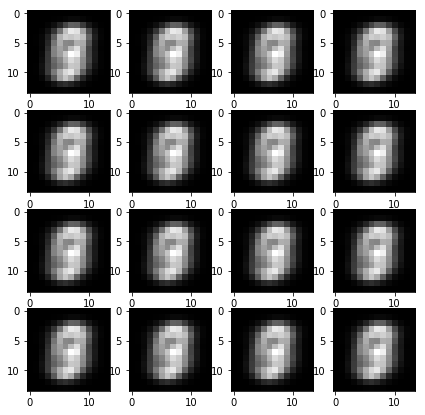

In [5]:
w=14
h=14
fig=plt.figure(figsize=(w/2,h/2))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    Z = np.random.normal(7,1,(Bc.shape))
#     Z    = mean + np.multiply((np.exp(0.5*cova)),gaus)
    outy = layer(Z,Wd,Bd)
    y    = sigm(outy)
    img = y.reshape(w,h)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

# outm = layer(Xf[1],Wm,Bm)
# mean = relu(outm)
# outc = layer(X,Wc,Bc)
# cova = relu(outc)
# gaus = np.random.normal(0,1,(cova.shape))
# Z    = mean + np.multiply((np.exp(0.5*cova)),gaus)
# outy = layer(Z,Wd,Bd)
# y    = sigm(outy)
# img  = y.reshape(w,h)

# plt.imshow(img,cmap='gray')

In [ ]:
print(np.sum(loss_2))

In [ ]:
'''
Wd = np.random.normal(0,1e-3,(100,input_size))
Bd = np.random.normal(0,1e-3,(1,input_size))

Wdi = np.random.normal(0,1,(mean,100))
Bdi = np.random.normal(0,1,(1,100))

#Here the covariance is log coavriance but named as coavriance for peace of mind while coding
lr = 1e-4
epochs = 300
batch_size = 60
number_of_batches = samples/batch_size
X_t = Xf.reshape(number_of_batches,batch_size,input_size)
# plt.imshow(X[1][10].reshape(14,14), cmap='gray')
for i in range(epochs):
    for j in range(number_of_batches):
        X = (X_t[j])
        # print(X.shape)
        loss = 0
        wm = np.zeros(Wm.shape)
        bm = np.zeros(Bm.shape)
        wc = np.zeros(Wc.shape)
        bc = np.zeros(Bc.shape)
        wd = np.zeros(Wd.shape)
        bd = np.zeros(Bd.shape)
        wdi = np.zeros(Wdi.shape)
        bdi = np.zeros(Bdi.shape)
        # forward pass
#         outi = layer(X,Wi,Bi)
#         aouti = sigm(outi)
        outm = layer(X,Wm,Bm)
        mean  = relu(outm)
        outc = layer(X,Wc,Bc)
        cova  = relu(outc)
    
    
        gaus = np.random.normal(0,1,(cova.shape))
        Z    = mean + np.multiply((np.exp(0.5*cova)),gaus)
        outyi = layer(Z,Wdi,Bdi)
        yi   = relu(outyi)
        outy = layer(yi,Wd,Bd)
        y = sigm(outy)
        
        # Backprop decoder part 
        temp = diff_SSE(y,X,batch_size)*diff_sigm(outy)
        bd   = np.sum(temp,axis=0)
        wd   = np.matmul(yi.T,temp)
        
        temp1 = backprop_layer_relu(temp,outyi,Wd)
        bdi  = np.sum(temp1, axis=0)
        wdi  = np.matmul(Z.T,temp1)
    
        ### Backprop Encoder part
        sct = -0.5*gaus*np.exp(0.5*cova)*backprop_layer_relu(temp1,np.exp(0.5*cova),Wdi)
        smt = -backprop_layer_relu(temp1,outm,Wdi)
        sm = smt + 2*(mean)*diff_relu(outm)                                                                            
    #     print(smt.shape, outm.shape, cova.shape)
        sc = sct + 0.5*(np.exp(cova)-1)*diff_relu(outc)
    #     print(smt)    
        ### 
    
        bm = np.sum(sm, axis=0).reshape(bm.shape)
        wm = np.matmul(X.T,sm)
    
        bc = np.sum(sc, axis=0).reshape(bc.shape)
        wc = np.matmul(X.T,sc)
        
        # we add up the sigmas coming from the previous layer to justify the divergence of 
        # one layer output to two others
        
        # Technically the functional output of the mean and variance layer to Z latent variable
        # Can be modelled as the identity and exp() functions and backprop can be done but gets a bit tedious
        # to define cases for all possible activations before that layer.
        
#         si = backprop_layer_sigm(sm,outi,Wm)+backprop_layer_sigm(sc,outi,Wc)
#         bi = np.sum(si, axis=0).reshape(bi.shape)
#         wi = np.matmul(X.T,si)
    
        loss_1 = np.sum(np.linalg.norm(y-X, axis=0))
        loss_2 = np.sum(np.exp(cova)-1-cova + mean*mean ,axis=1)
        loss   = loss_1 + np.sum(loss_2)
        
#         print(Wc.shape, wc.shape)
        
        Wm -= lr*wm
        Bm -= lr*bm
        Wc -= lr*wc
        Bc -= lr*bc
        Bd -= lr*bd
        Wd -= lr*wd
        Wdi -= lr*wdi
        Bdi -= lr*bdi
    print(loss)
'''